In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

class CNNModel:
    def __init__(self, input_shape, num_classes):
        """Initialize the CNNModel class."""
        self.model = self.build_model(input_shape, num_classes)

    def build_model(self, input_shape, num_classes):
        """Build the CNN architecture."""
        model = Sequential([
            Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
            MaxPooling2D((2, 2)),
            Dropout(0.25),
            
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            MaxPooling2D((2, 2)),
            Dropout(0.25),
            
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(num_classes, activation='softmax')
        ])
        return model

    def compile(self):
        """Compile the CNN model."""
        self.model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    def train(self, X_train, y_train, X_val, y_val, epochs=20, batch_size=64):
        """Train the CNN model with early stopping."""
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        history = self.model.fit(X_train, y_train,
                                 epochs=epochs,
                                 batch_size=batch_size,
                                 validation_data=(X_val, y_val),
                                 callbacks=[early_stopping])
        return history

    def evaluate(self, X_test, y_test):
        """Evaluate the CNN model."""
        return self.model.evaluate(X_test, y_test)

    def save(self, file_path):
        """Save the trained CNN model."""
        self.model.save(file_path)


# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split a portion of training data for validation
X_val, y_val = X_train[-5000:], y_train[-5000:]  # Take the last 5000 samples as validation data
X_train, y_train = X_train[:-5000], y_train[:-5000]  # Keep the remaining as training data

# Instantiate and use the CNNModel class
cnn = CNNModel(input_shape=(32, 32, 3), num_classes=10)
cnn.compile()

# Train the model with early stopping
history = cnn.train(X_train, y_train, X_val, y_val, epochs=20, batch_size=64)

# Evaluate the model
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

# Save the model
cnn.save('cnn_cifar10_model.h5')


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.2766 - loss: 1.9542 - val_accuracy: 0.5292 - val_loss: 1.3683
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 21ms/step - accuracy: 0.4754 - loss: 1.4576 - val_accuracy: 0.5784 - val_loss: 1.2026
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step - accuracy: 0.5217 - loss: 1.3355 - val_accuracy: 0.5972 - val_loss: 1.1078
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.5543 - loss: 1.2490 - val_accuracy: 0.6380 - val_loss: 1.0343
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.5710 - loss: 1.1931 - val_accuracy: 0.6534 - val_loss: 0.9873
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.5885 - loss: 1.1515 - val_accuracy: 0.6650 - val_loss: 0.9840
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.6074 - loss: 1.1124 - val_accuracy: 0.6688 - val_loss: 0.9573
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.6158 - loss: 1.0807 - 

Test Accuracy: 0.71


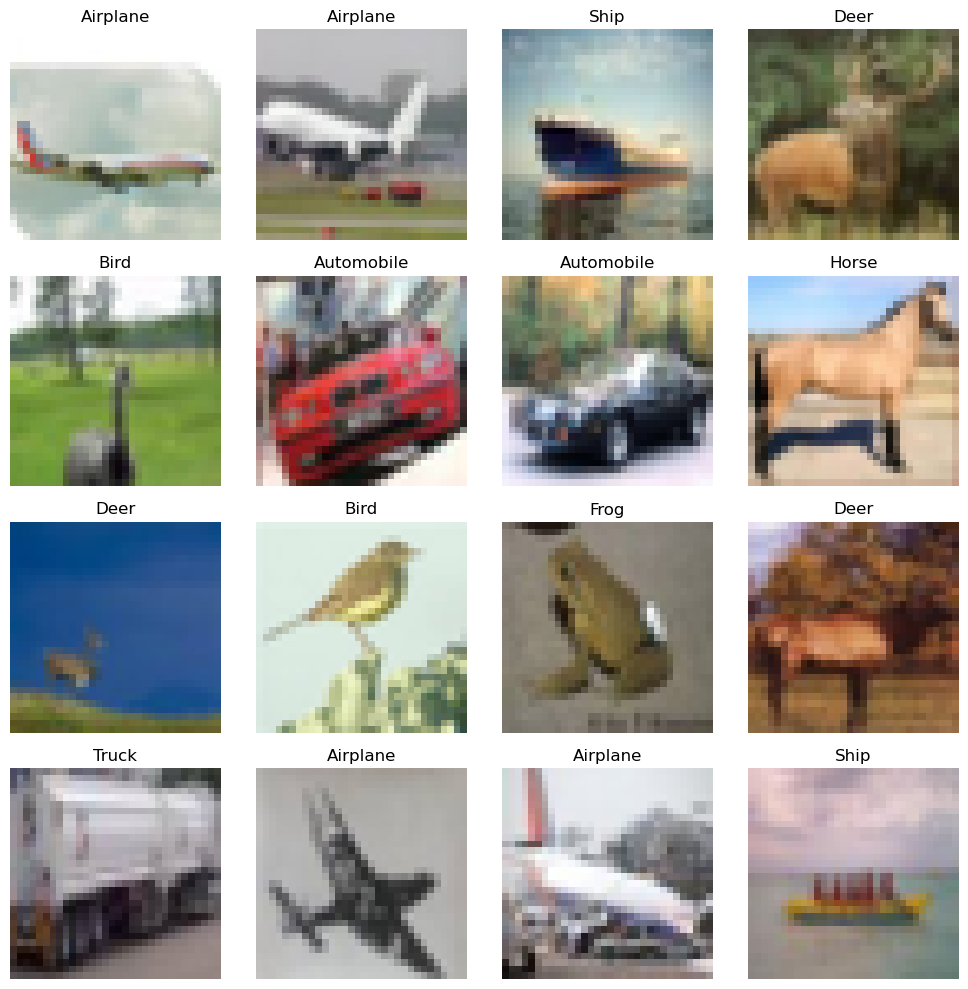

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (_, _) = cifar10.load_data()

# Class labels for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Function to display images in a grid
def display_samples(X, y, class_names, samples=16):
    plt.figure(figsize=(10, 10))
    indices = np.random.choice(X.shape[0], samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(4, 4, i + 1)
        plt.imshow(X[idx])
        plt.title(class_names[int(y[idx])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display 16 random samples from the training dataset
display_samples(X_train, y_train, class_names, samples=16)

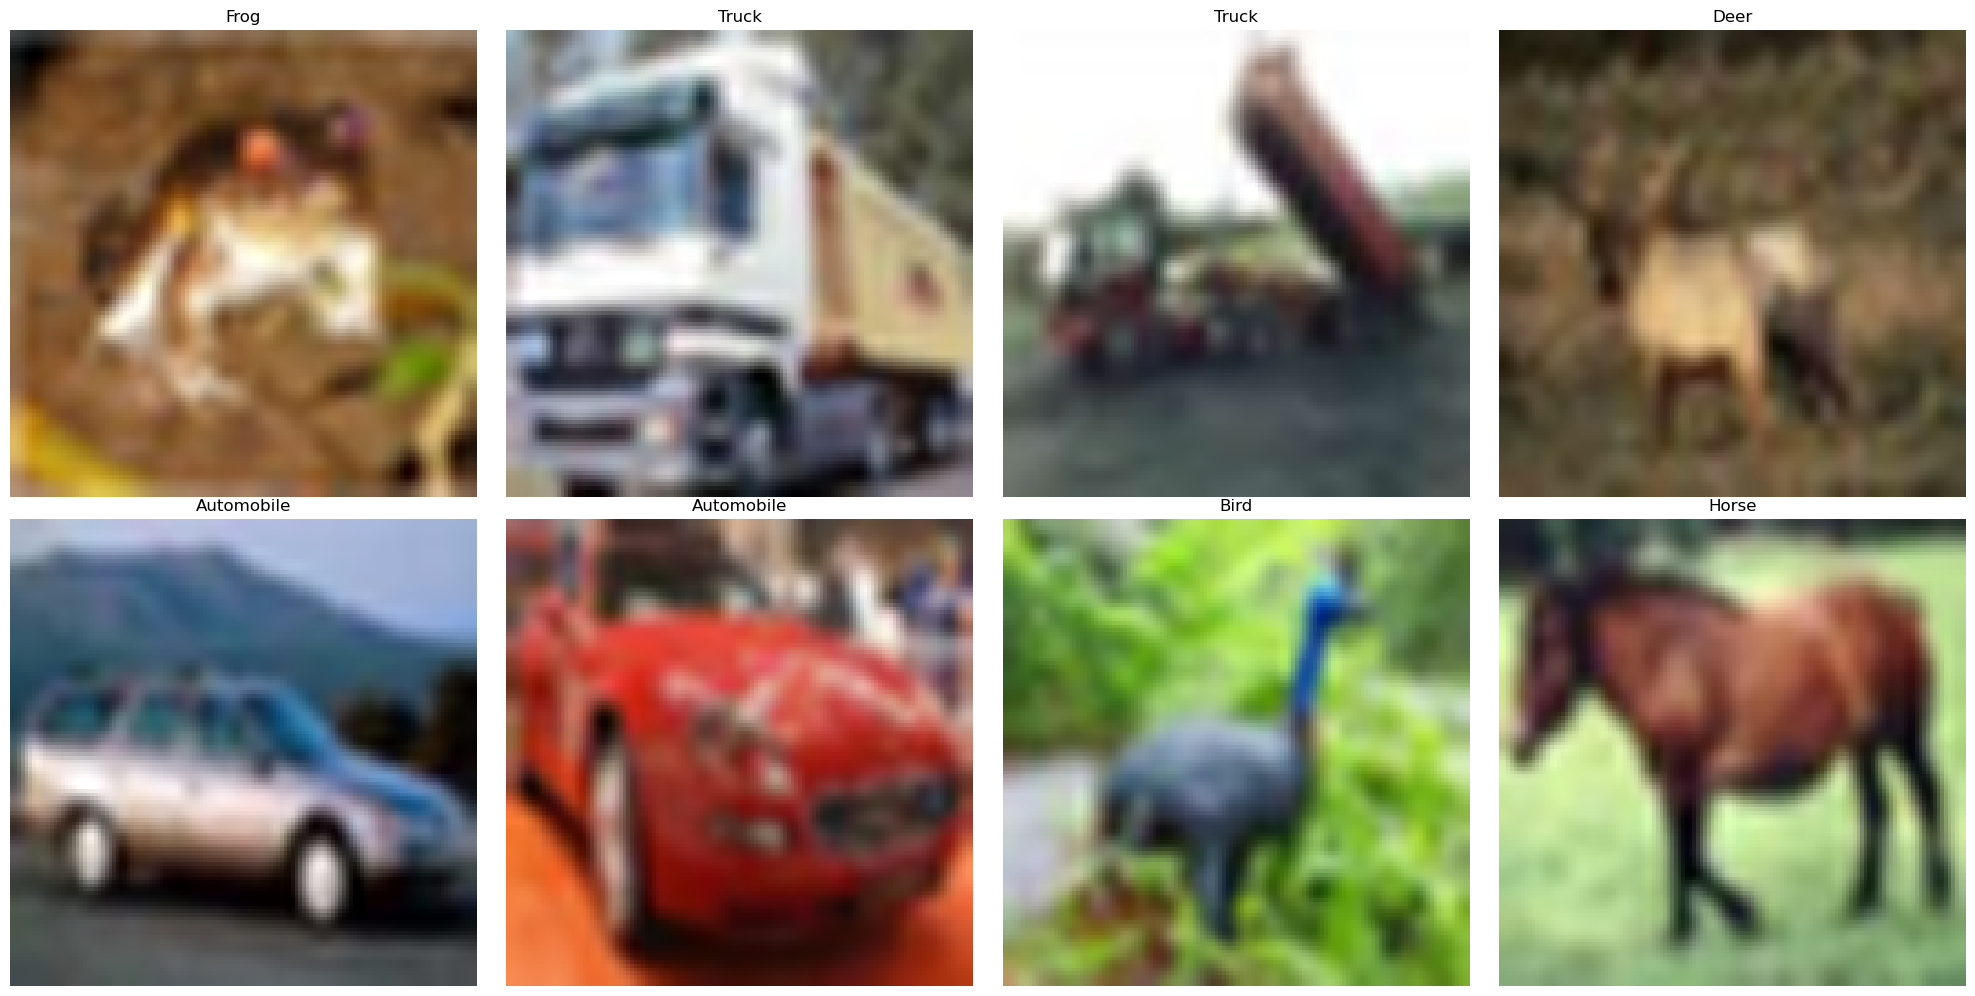

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (_, _) = cifar10.load_data()

# Upscale images for better clarity
def upscale_images(images, scale=4):
    upscaled_images = []
    for img in images:
        upscaled = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
        upscaled_images.append(upscaled)
    return np.array(upscaled_images)

# Display sample upscaled images
def display_upscaled_samples(X, y, class_names, samples=8):
    upscaled = upscale_images(X[:samples])
    plt.figure(figsize=(20, 10))
    for i in range(samples):
        plt.subplot(2, 4, i + 1)
        plt.imshow(upscaled[i])
        plt.title(class_names[int(y[i])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Class labels for CIFAR-10
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display images
display_upscaled_samples(X_train, y_train, class_names)


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model class
class CNNModel:
    def __init__(self, input_shape, num_classes):
        self.model = self.build_model(input_shape, num_classes)

    def build_model(self, input_shape, num_classes):
        model = Sequential([
            tf.keras.Input(shape=input_shape),
            Conv2D(32, (3, 3), activation='relu', padding='same'),
            MaxPooling2D((2, 2)),
            Dropout(0.25),
            Conv2D(64, (3, 3), activation='relu', padding='same'),
            MaxPooling2D((2, 2)),
            Dropout(0.25),
            Flatten(),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(num_classes, activation='softmax'),
        ])
        return model

    def compile(self):
        self.model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test)

# Instantiate the CNN model
cnn = CNNModel(input_shape=(32, 32, 3), num_classes=10)
cnn.compile()

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

# Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

# Train the model
history = cnn.model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(X_test, y_test),
    callbacks=[lr_scheduler]
)

# Evaluate the model
test_loss, test_acc = cnn.evaluate(X_test, y_test)
print(f"Test Accuracy after enhancements: {test_acc:.2f}")


Epoch 1/20


C:\anaconda3\anacondamain\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 36ms/step - accuracy: 0.2619 - loss: 1.9805 - val_accuracy: 0.4773 - val_loss: 1.4315 - learning_rate: 0.0010
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.4266 - loss: 1.5619 - val_accuracy: 0.5289 - val_loss: 1.2975 - learning_rate: 0.0010
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.4822 - loss: 1.4408 - val_accuracy: 0.5839 - val_loss: 1.1864 - learning_rate: 0.0010
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.5117 - loss: 1.3725 - val_accuracy: 0.6094 - val_loss: 1.1134 - learning_rate: 0.0010
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.5259 - loss: 1.3358 - val_accuracy: 0.6125 - val_loss: 1.0868 - learning_rate: 0.0010
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.5404 - loss: 1.2917 - val_accuracy: 0.6278 - val_loss: 1.0618 - learning_rate: 0.0010
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.5479 - loss: 1.2707